In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')


In [3]:
sheets = ["SHA", "QIA", "JA", "ashes", "spider"]
colors = ["black", "black", "#c95428"]
grey = "#838383"

In [4]:
sha = pd.read_excel("../manuscript_data.xlsx", sheet_name=sheets[0])
sha.head(3)


,sample,depth,lithology,rock-type,age,d13C,d18O,Hg,TOC,Hg_TOC,...,Fe,V,d202Hg,d202_se,D199Hg,D199_se,D200Hg,D200_se,D201Hg,D201_se
0,SHA 324 C+iso,38.0,Limestone,Limestone,early Smithian,0.772073,-7.349515,15.9,0.453358,35.071652,...,0.851051,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SHA 504 iso,38.2,Limestone,Limestone,early Smithian,2.641254,-4.536860,NaN,1.022702,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SHA 325 C+iso,38.4,Limestone,Limestone,early Smithian,1.676012,-7.320730,4.3,0.048060,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Hg_TOC= sha["Hg_TOC"]
depth = sha["depth"]
TOC = sha["TOC"]
d202Hg=sha["d202Hg"]
err202=sha["d202_se"]
D199 = sha["D199Hg"]
err199=sha["D199_se"]
D200 = sha["D200Hg"]
err200=sha["D200_se"]
d13C = sha["d13C"]
Hg=sha["Hg"]

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


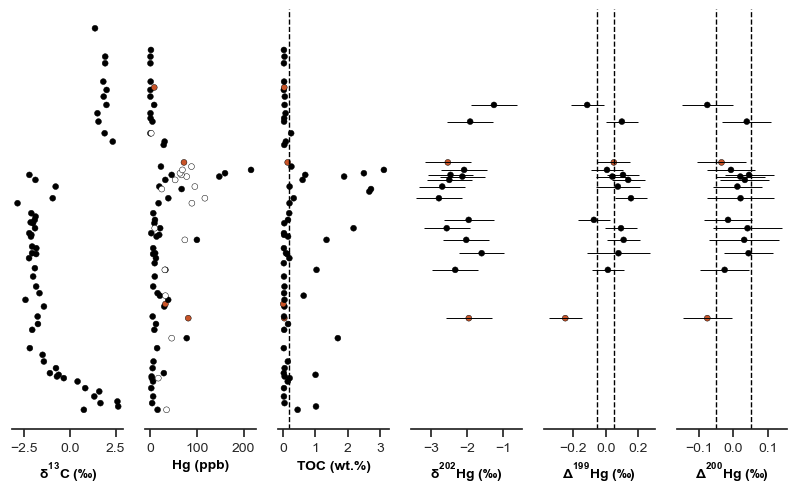

In [6]:
fig, axes = plt.subplots(figsize=(10, 5.45),  # constrained_layout=True,
                         ncols=6, nrows=1, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes

# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])

#define the variables needed to iterably make the figures.
subs = ['d13C', 'Hg', 'TOC', 'd202Hg', 'D199Hg', 'D200Hg']
ax= [ax0, ax1, ax2, ax3, ax4, ax5]
xlabels = ["$\delta^{13}C\;(‰)$", "Hg (ppb)", "TOC (wt.%)",
           "$\delta^{202}Hg\;(‰)$", "$\Delta^{199}Hg\;(‰)$", "$\Delta^{200}Hg\;(‰)$"]
err= ["d202_se", "D199_se", "D200_se"]
err_subs = [d202Hg, D199, D200]
ax_2=[ax3, ax4, ax5]
# make the subplots using a for loop.
for ix, sub in enumerate(subs):
    sns.scatterplot(data=sha, x=sha[sub], y=depth, ax=ax[ix],
                    color='black', legend=False, edgecolor='black',
                    size=20, hue='rock-type', palette=colors
                    )
    ax[ix].tick_params(labelsize=10)
    ax[ix].set_xlabel(xlabels[ix], fontsize=10, c="black", fontweight="bold")

# add extra plot to 2nd subplot
sns.scatterplot(data=sha, x=Hg_TOC, y=depth, ax=ax1,
                    color='white', legend=False, edgecolor='black',
                    size=20, alpha=1)
# Annotate axes.
ax2.axvline(x=0.2, linestyle="--", color="black", linewidth=1)
ax4.axvline(x=-0.05, linestyle="--", color="black", linewidth=1)
ax4.axvline(x=0.05, linestyle="--", color="black", linewidth=1)
ax5.axvline(x=-0.05, linestyle="--", color="black", linewidth=1)
ax5.axvline(x=0.05, linestyle="--", color="black", linewidth=1)
ax2.set_xticks([0, 1, 2, 3])
ax4.set_xticks([-.2, 0, .2])
ax1.set_xticks([0, 100, 200])

# add error bars to Hg-isotope subplots
for ix, sub in enumerate(err):
    ax_2[ix].errorbar(xerr=sha[sub], y=depth,x=err_subs[ix], ecolor="black", color="black",
             linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')

plt.savefig("../plots/sha_all2.pdf", dpi=600)